In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Data Setup: Do not Edit

In [55]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)
# set the random seed value to 0
np.random.seed(0)

In [56]:
X.shape

(442, 10)

## Shuffle X and y

In [57]:
def shuffle_data(X,y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]

X, y = shuffle_data(X,y)

In [58]:
print(np.mean(y[:5]))

180.4


## Splitting Data into training and testing

In [59]:
def train_test_split(X,y,test_size):
    test_num = X.shape[0] - int(X.shape[0]*test_size)
    X_test, y_test = X[test_num:], y[test_num:]
    X_train, y_train = X[:test_num], y[:test_num]
    return X_train, X_test, y_train, y_test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,0.25)

In [61]:
np.sum(y_test)

16960.0

## Adding Dummy feature and taking transpose

In [62]:
train_dummy = np.ones(len(y_train))
test_dummy = np.ones(len(y_test))

In [63]:
X_train = np.row_stack((train_dummy, X_train.T))
X_test = np.row_stack((test_dummy, X_test.T))
print(X_train.shape)
print(X_test.shape)

(11, 332)
(11, 110)


## Computing Weights Using Linear Regression formula

Recall that the formula to calculate the optimum weights is:
$$
w=(XX^T)^{-1}Xy
$$

In [64]:
def compute_weights(X,y):
    return np.linalg.pinv(X @ X.T) @ X @ y

In [65]:
weights = compute_weights(X_train, y_train)
print(weights.shape)

(11,)


In [66]:
print(weights[0])

150.80818854686095


## Computing Mean Squared Error

In [67]:
def MSE(X,y,w):
    predictions = w.T @ X
    return np.mean((y - predictions)**2)

In [68]:
print(MSE(X_train, y_train, weights))
print(MSE(X_test, y_test, weights))

2921.8874514067493
2745.430111174353


## Computing Weights using Ridge Regression

Closed form formula for Ridge Regression:
$$
w_{ridge} = (XX^T+\lambda I)^{-1}XY
$$

In [69]:
def compute_weights_ridge(X,y,alpha):
    return np.linalg.pinv(X @ X.T + alpha*np.eye((X.shape[0]))) @ X @ y

In [70]:
w_ridge = compute_weights_ridge(X_train, y_train, 0.3)

In [71]:
train_error_ridge = MSE(X_train, y_train, w_ridge)
test_error_ridge = MSE(X_test, y_test, w_ridge)

In [72]:
print(train_error_ridge - test_error_ridge)

99.46973870899592


## Plotting Weights and Sums of Weights

In [74]:
w = []
w_sums = []

for r in np.linspace(0,5,11):
    weight = compute_weights_ridge(X_train,y_train,r)
    w.append(weight)
    w_sums.append(np.sum(weight))

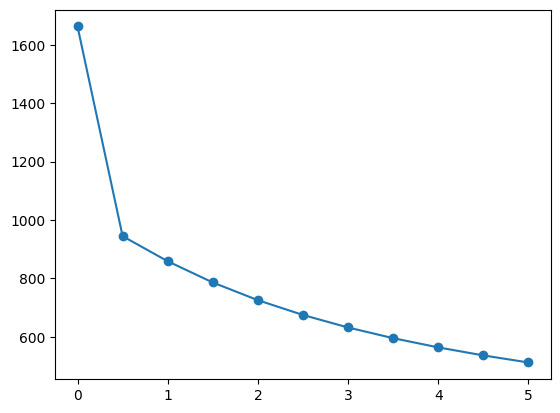

In [77]:
x_axis = np.linspace(0,5,11)
y_axis = w_sums
plt.plot(x_axis, y_axis, 'o-')
plt.show()